#  Data Science Consultancy for Mr. Grapeglamour's Winery Revamp🍷✨

## Background:
Mr. Gaurav Grapeglamour, a prominent wine baron, seeks consultancy services from the company you work in to modernize his traditional wine breweries and distribution systems.

As part of the consultancy, we will utilize **"the Red Wine Quality dataset"** (You can download this dataset from the Google drive https://drive.google.com/file/d/175z080Ki2e_7jhLG72kVHos4Q_2ZoJOQ/view?usp=drive_link) to analyze and classify the quality of his red wines. By leveraging data science techniques, we aim to optimize processes, minimize losses, and enhance overall wine quality.

*The Red Wine Quality dataset contains various physicochemical properties of red wines along with their quality ratings on a scale from 0 to 10.*

##### **Homework Submission**
**Do NOT delete/modify any part of the questions when submitting. Including the pre-loaded comments within the code.**

You may feel free to add your own additional comments.
Submit **this** Google Colab/Jupyter Notebook file on Gradescope. Cheers!🥂

### Part A (5 points total)
#### Your company has an inside source at one of Mr. Gaurav Grapeglamour's wine brewery. They have requested him to provide your consultant company with the data in order to devise a strategy to impress Mr. Grapeglamour. You have been asked to submit a summary of data received from the brewery.

##### Import Libraries (1 pt)
Import the following libraries (the rest of the library declarations are done for you below):
- **numpy** as *np*
- **pandas** as *pd*

In [ ]:
# Import the necessary libraries
# ANSWER STARTING HERE
import numpy as np
import pandas as pd

In [ ]:
# Make sure to install the necessary modules to import!
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Load the Dataset (1 pt)
Load the Red Wine Quality dataset in a dataframe named **wine_data**.

In [ ]:
# Load the Red Wine Quality dataset
# ANSWER STARTING HERE
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Explore the Data (3 pts)
Let's see what's inside the dataset first to get a feel for what can be expected. Write only a **single line** of code for each.
- Print the Number of **Samples** in the dataset (A numerical value).
- Print the Number of **Features** in the dataset (A numerical value)
- Print the **unique** classes for determining *Quality*

In [ ]:
# Display basic information about the dataset

# Number of Samples
# ANSWER HERE
print(f'No. of samples: {wine_data.shape[0]}')

# Number of Features
# ANSWER HERE
print(f'No. of Features: {wine_data.shape[1]}')

# Classes for wine quality
# ANSWER HERE
print(f"Unique classes: {wine_data['quality'].unique()}")

No. of samples: 1599
No. of Features: 12
Unique classes: [5 6 7 4 8 3]


### Part B (8 Points Total)
#### Your manager in the consultant company, Aishani Applecider, has tasked you to utilize the data provided by Mr. Grapeglamour's wine brewery and come up with a model to predict whether place the wine in a expensive wine aisle or not.

#### Let's prepare the data to make this wish come true!

***(Note the criteria for expensive wine is the quality of wine should be > 6)***

##### Preprocessing of the Data (2 pts)
Before we dive deep, we need to prep the data to make it usable.
- Handle the **missing values** in the data by **discarding them.**

In [ ]:
# Write a code that handle missing values in wine_data by discarding them from the dataset
# ANSWER STARTING HERE
wine_data.dropna(inplace=True)
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##### Splitting, Training, and Testing (6 pts)
Typically in Machine learning, we wish to split the data into various portions in order to let a machine learning model train itself on one part of the data and test itself on another part of the data. This is to evaluate the model's performance on the dataset.

Training data is used to teach the model, while testing data assesses its generalization to unseen examples.

Splitting helps prevent overfitting, ensuring the model can make accurate predictions on new, unseen data.

Once again, ***Note the criteria for expensive wine is the quality of wine should be > 6***
- Determine what are the **features** (**X**) and **the target label** (**y**) are from the dataset.

In [ ]:
# Choose classification algorithms
# ANSWER STARTING HERE

#creating a new col : 1 if expensive, 0 otherwise
wine_data['expensive'] = (wine_data['quality'] > 6).astype(int)

# creating X and Y variables
X = wine_data.drop(columns=['quality', 'expensive'])
y = wine_data['expensive']

- **Split** the features and target labels into **training and testing sets**.

*Hint: Look into this function* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Test size should be **0.3**

In [ ]:
# Split the data into training and testing sets (~ approximately 1 line)
# pass this seed to your split argument
seed = 42
# ANSWER STARTING HERE
# X_train, X_test, y_train, y_test = WRITE YOUR CODE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


After splitting the data, we wish to standardize the feature sets in order to make sure that the machine learning model is not biased by differences in scales/units within the data. Standardizations aids with consistency in the data.

- **Standardize** the feature training and testing sets

*Hints: Look into these functions and classes* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# Normalize or standardize the feature sets (both X_train and X_test)
# ANSWER STARTING HERE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Part C (15 Points Total)

#### Your promotion is dependent on this project. Hence, Ms. Applecider asks you to be thorough with your model search. You are asked to train 4 different classifiers, namely **KNN**, **DecisionTree**, **Logistic Regression**, and **Random Forest**.

##### Load Models (4 pts)
We want to organize a structure in order to choose an algorithm model.
This way, it can be used for k-fold cross-validation to build the model.

- **Create** a python dictionary named **models** that holds the names of **all 4 models** and the models itself as mentioned.

In [ ]:
# Choose classification algorithms
# ANSWER STARTING HERE
models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier()
}

##### K-fold Cross-Validation (8 pts)
Using the standardized feature sets do the following:
- Given the numbers of folds and the object with the specified number of splits, perform **k-folds cross-validation** for **each** model.
- Print the **name** of the model and **cross validation accuracy** (mean and standard deviation) for each.

*Hint: Look into this function* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
# Perform k-fold Cross-Validation for each model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, model in models.items():
  # ANSWER STARTING HERE
  print(f"Model: {model_name}")
  scores = cross_val_score(model, X_train, y_train, cv=skf)
  # print(scores)
  print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")
  print()

Model: KNN
Accuracy: 0.8677250160153747 (+/- 0.021337585573676265)

Model: DecisionTree
Accuracy: 0.8730901665598975 (+/- 0.013233927509305314)

Model: LogisticRegression
Accuracy: 0.8811499039077514 (+/- 0.012444281125712123)

Model: RandomForest
Accuracy: 0.9088484945547725 (+/- 0.006034117893712417)



##### Question: What is the most accurate ML model from above choice? Why? (3 pts)
ANSWER RIGHT HERE!
Random forest is the most accurate model since it has the most accuracy and moreover the std deviation is the least for random forest model

### Part D (12 Points Total)
#### Ms. Aishani Applecider asks to deploy all the models and has  tasked you to evaluate all the models on the heldout test set.

##### Model Evaluation (6 pts)
For each of the models do the following in order to evaluate each of them properly:
- STEP 1: **Train** each of the models


In [ ]:
# Train each model using the training data
for model_name, model in models.items():
  # ANSWER STARTING HERE
  model.fit(X_train, y_train)

- STEP 2: Print each of the **accuracies** of the models by their **names** in this **format**: Accuracy of (model name): (accuracy of the model).
- Print a **classification report** meaning each model would have to predict accuracy, precision, recall and f1-score.

*Hint: Look into this function!* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
# Evaluate the performance of each model
for model_name, model in models.items():
  # ANSWER STARTING HERE
  print(f"Accuracy of {model_name}: {model.score(X_test, y_test)}")
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

Accuracy of KNN: 0.8708333333333333
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.55      0.45      0.49        67

    accuracy                           0.87       480
   macro avg       0.73      0.69      0.71       480
weighted avg       0.86      0.87      0.87       480

Accuracy of DecisionTree: 0.8645833333333334
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.51      0.63      0.56        67

    accuracy                           0.86       480
   macro avg       0.72      0.77      0.74       480
weighted avg       0.88      0.86      0.87       480

Accuracy of LogisticRegression: 0.8645833333333334
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.53      0.30      0.38        67

    accuracy                           0.86       

##### Model Interpretation (6 points)
- **Interpret** the results of the classification models (list the models which got the best scores for Accuracy, Precision, Recall and F1 score).
- Recommend the best model according to your analysis.


ANSWER RIGHT HERE!

1. Interpret the results of the classification models

- Accuracy: The RandomForest model achieved the highest accuracy at 88.54%.

- Precision: Both Random Forest and Decision Tree model has same precsion i.e. 88%.

- Recall: The RandomForest model had the highest recall at 89%.

- F1-score: The RandomForest model also had the highest F1-score at 88%.

2. Recommend the best model according to your analysis

- The RandomForest model is recommended as the best overall. It achieved the highest scores in accuracy, recall, and F1-score, indicating strong performance across these key metrics.

### Part E (10 points)

#### Seeing all the effort and hard work, Mr. Gaurav Grapeglamour is happy with your consultant company so far (as long as you have done the work). Your promotion is also around the corner 🎉!

#### However, Mr. Gaurav has one last question about the wine quality.

##### What are the top 3 features from the top performing that affects the quality of wine the most?
- Create a dataframe for **feature importance**
- **Extract**, **Sort**, and **Display** the **top 3** features from that dataframe.

*Hint: Look into these functions*

[Documentation1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

[Documentation2](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_)




In [ ]:
# Extract the feature importances from the most accurate model
# ANSWER STARTING HERE
fimportances = models['RandomForest'].feature_importances_
fdf = pd.DataFrame({
    'Feature': X.columns,  # Get feature names from the X DataFrame
    'Importance': fimportances
})
fdf.sort_values(by='Importance', ascending=False, inplace = True)
print(fdf.head(3))

             Feature  Importance
10           alcohol    0.190934
9          sulphates    0.119923
1   volatile acidity    0.112960


**You have been promoted!!**

**You are now one of the consulting company's elite employees! 🎊🎉🥂🥳**

![](https://media.giphy.com/media/JIX9t2j0ZTN9S/giphy.gif?cid=790b76111hlwamin05rcv1ujslgjh5o49haj07h4wpuvwkgz&ep=v1_gifs_search&rid=giphy.gif&ct=g)

### Data Visualization ✨ (5 points total)
The matplotlib and seaborn libraries are great tools for visualizing data.

They are used to create very legible and complex graphs that are essential in data interpretation and analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualize the distribution of each feature in the original dataset for different quality classes (3 pts)
- **Plot** out histograms for each feature (You can use a for loop)
- Label the **title** of each histogram "Distribution of (Feature Name) by Quality"
- Label the **axes** appropriately and display each histogram.

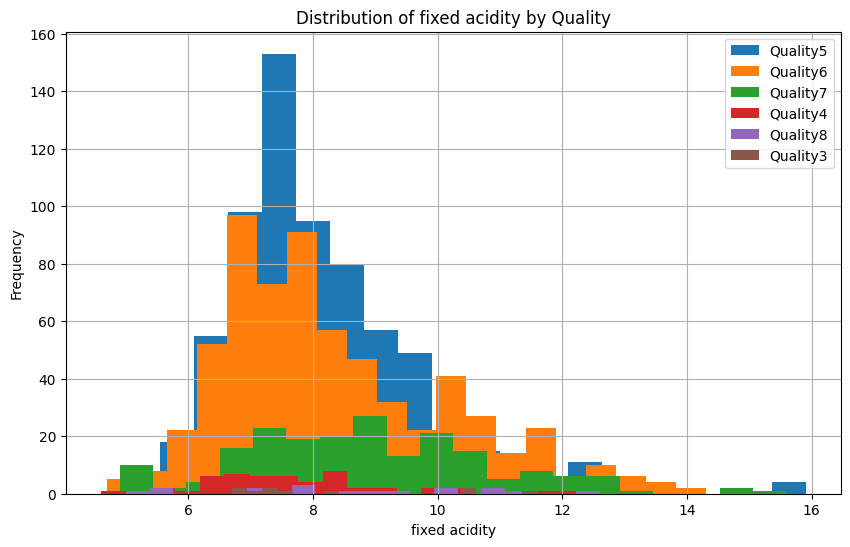

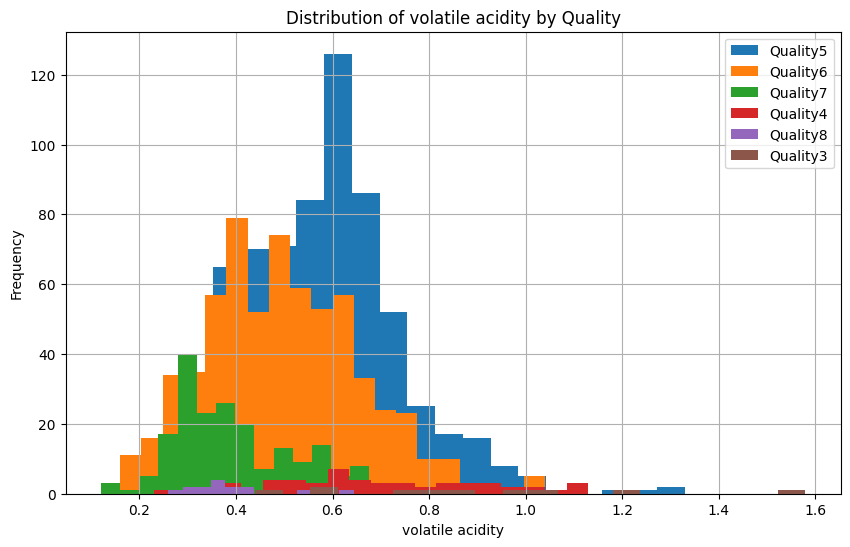

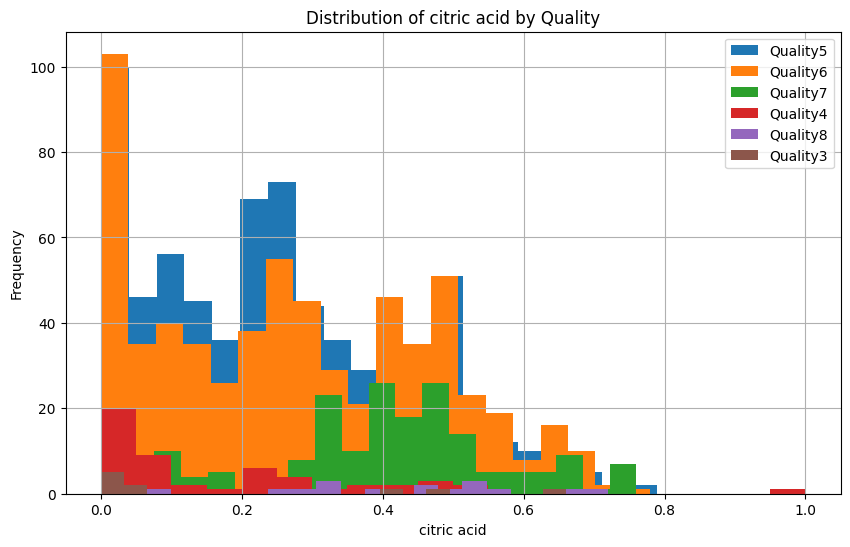

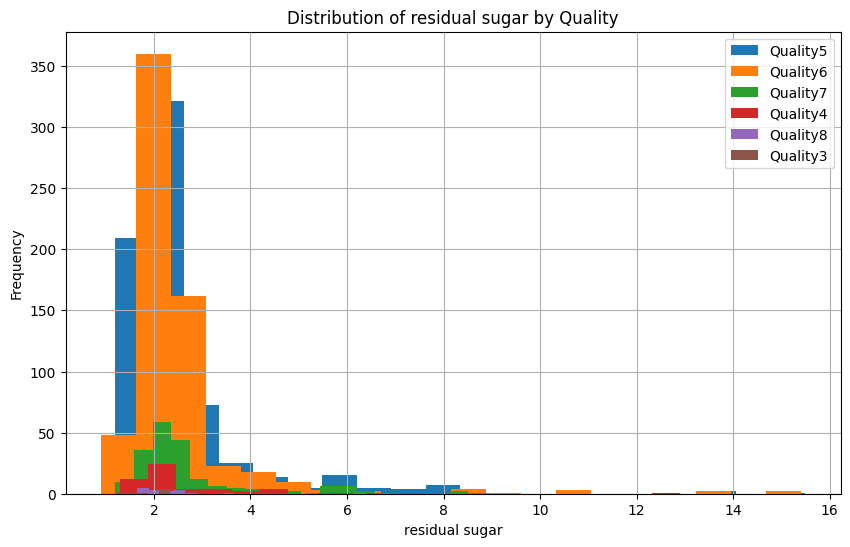

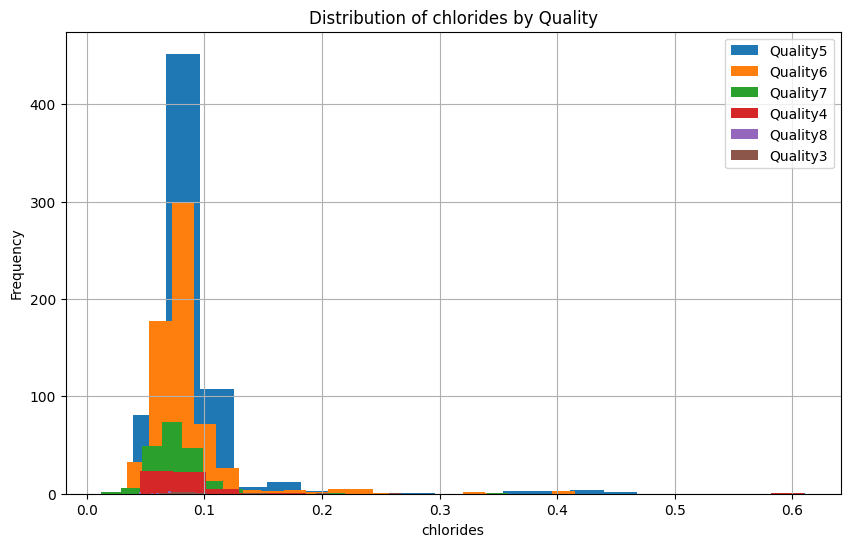

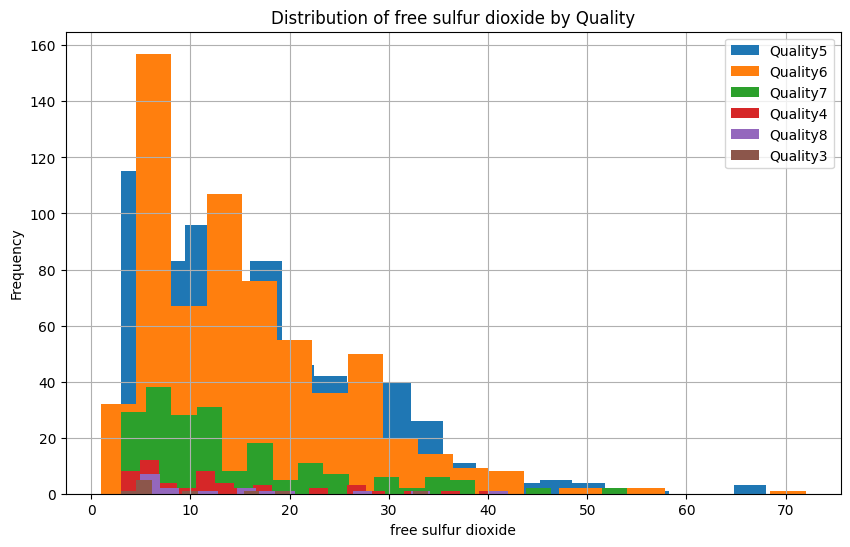

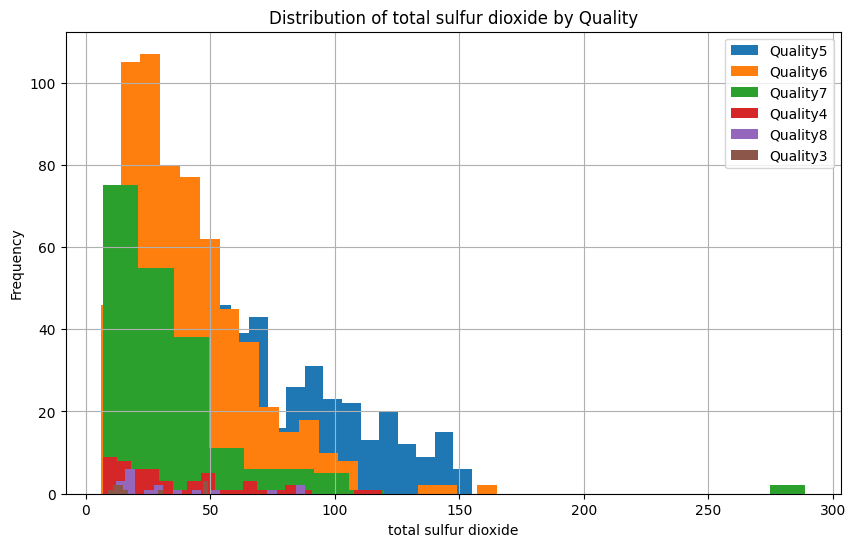

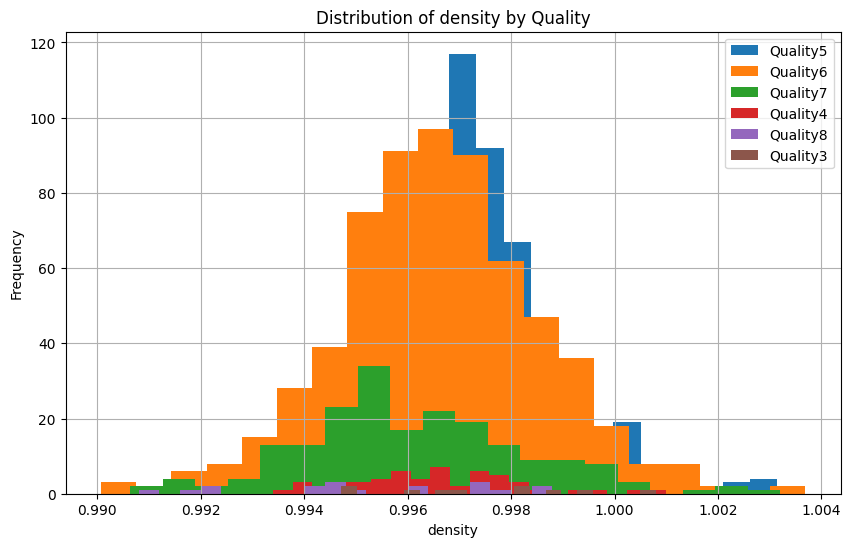

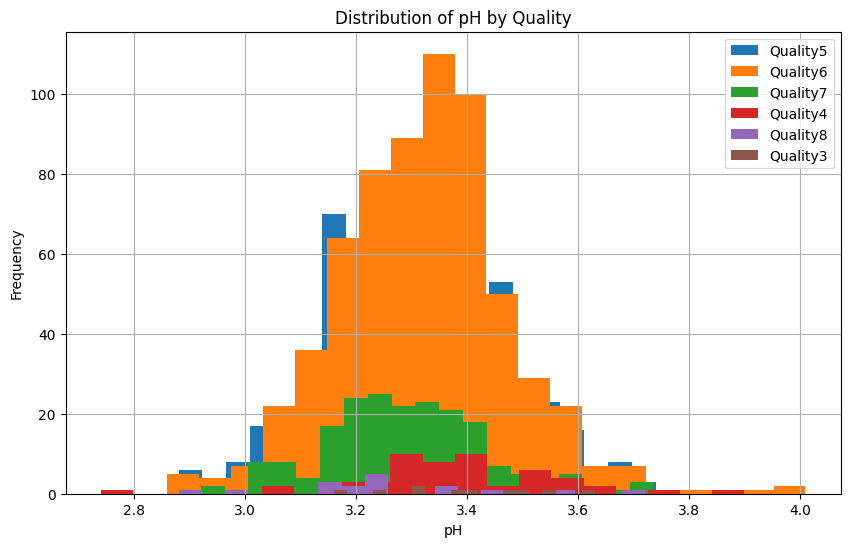

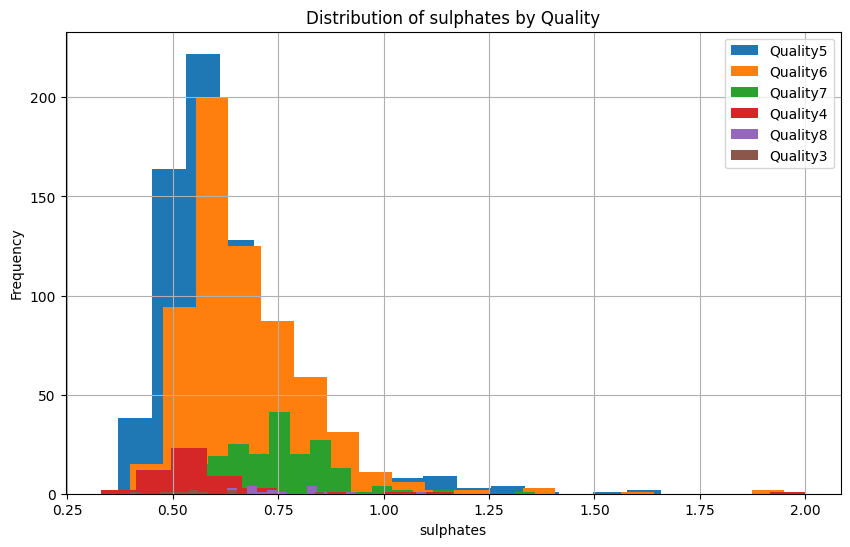

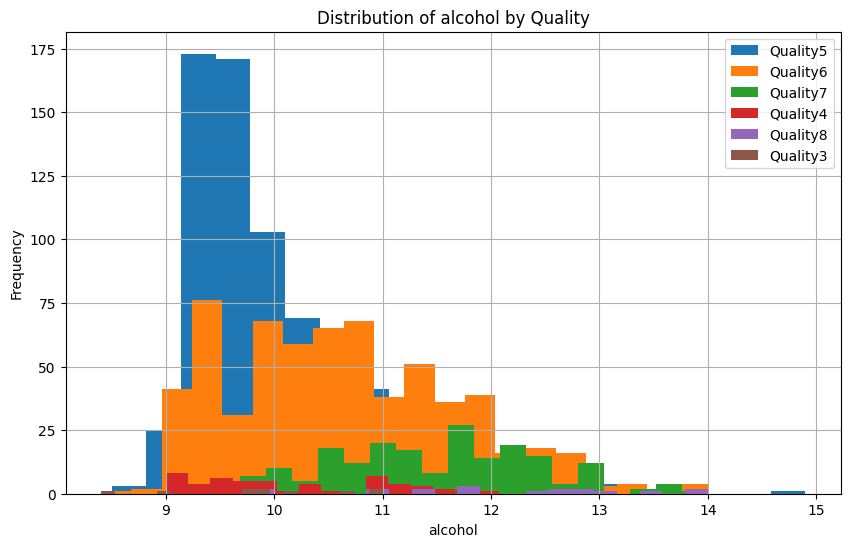

In [ ]:
# Histograms for each feature
for feature in wine_data.columns[:-2]:  # Exclude 'quality' column
  # ANSWER STARTING HERE
  plt.figure(figsize=(10, 6))
  for quality in wine_data['quality'].unique():
    subset = wine_data[wine_data['quality'] == quality]
    plt.hist(subset[feature], bins=20, alpha=1, label=f'Quality{quality}')

  plt.title(f'Distribution of {feature} by Quality')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.legend()
  plt.grid(True)
  plt.show()

##### Explore correlations between features and quality ratings (2 pts)
- Create a **correlation matrix** based on the correlations between features and quality
- **Display** the matrix

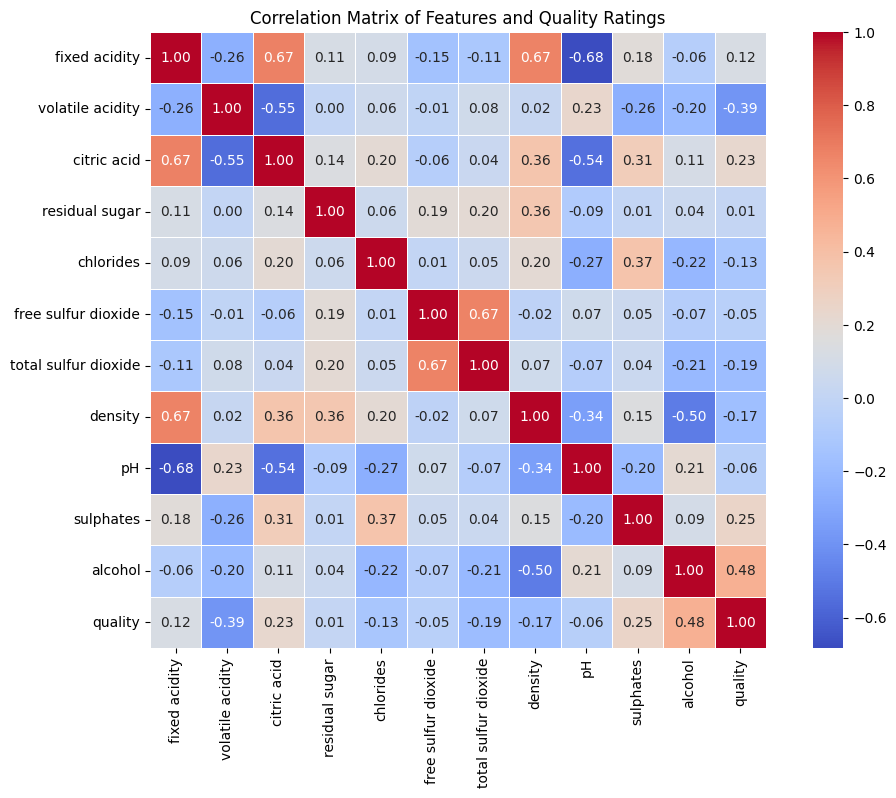

In [ ]:
# Correlation Matrix
# ANSWER STARTING HERE
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.iloc[:,:-1].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Features and Quality Ratings')
plt.show()